In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# set the random seed for reproducibility
np.random.seed(42)

# set the image size and batch size
img_size = (224, 224)
batch_size = 64

In [5]:
import os
import sys
os.chdir("/kaggle/input/chest-xray-pneumonia/chest_xray")
os.listdir()

['chest_xray', '__MACOSX', 'val', 'test', 'train']

In [6]:
train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

# Preprocessing & Data Augmentation XRay Images

Inspired by - 
```
@article{article,
author = {Mustapha, Aouache and Hussain, Aini and Samad, Salina},
year = {2011},
month = {10},
pages = {4246-4258},
title = {A new approach for noise reduction in spine radiograph images using a non-linear contrast adjustment scheme based adaptive factor},
volume = {620},
journal = {Scientific Research and Essays}
}
```

In [46]:
os.mkdir("/kaggle/working/chest-xray-pneumonia")
os.mkdir("/kaggle/working/chest-xray-pneumonia/chest_xray")
os.mkdir("/kaggle/working/chest-xray-pneumonia/chest_xray/train")



FileExistsError: [Errno 17] File exists: '/kaggle/working/chest-xray-pneumonia'

In [52]:
os.mkdir("/kaggle/working/chest-xray-pneumonia/chest_xray/test")



In [51]:
# # os.rmdir(pathf)
# import shutil
# shutil.rmtree('/kaggle/working/chest-xray-pneumonia/chest_xray/test/')

In [8]:
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from skimage import exposure, filters

for category in os.listdir(train_path):
    os.chdir(os.path.join(train_path,category))
    pathf = os.path.join("/kaggle/working/chest-xray-pneumonia/chest_xray/train",category)
    os.mkdir(pathf)
    print(category)

    for ix in os.listdir(): #Images
            img = cv2.imread(ix)
            img_resized = cv2.resize(img, (224, 224))
      

            # perform gamma correction on the image
            gamma = 1.5
            img_gamma = np.power(img_resized / 255.0, gamma)
            img_gamma = np.uint8(img_gamma * 255)

            # perform image normalization on the image
            img_norm = cv2.normalize(img_gamma, None, 0, 255, cv2.NORM_MINMAX)

#             # normalize the pixel values of the image
#             img_normalized = StandardScaler().fit_transform(img_resized.reshape(-1, 3)).reshape(img_resized.shape)

            # perform CLAHE  on the image
            # perform CLAHE on the image
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            img_clahe = clahe.apply(img_norm[:,:,0])

            # sharpen the image using unsharp masking
            img_sharpened = cv2.GaussianBlur(img_clahe, (5,5), 0)
            img_sharpened = cv2.addWeighted(img_clahe, 1.5, img_sharpened, -0.5, 0)

            # apply a median filter to the image
            img_median = filters.median(img_sharpened) 
            filename1 = str(pathf)+"/"+ix
            filename2 = str(pathf)+"/"+"modified_"+ix
#             cv2.imwrite(filename1,img)
            cv2.imwrite(filename2,img_median) # Saving Modified Image
            print(str(ix+"saved"))
            
            
#             cv2.imshow("Original Image", img)
#             cv2.imshow("Preprocessed Image", img_median)
    
    
    

PNEUMONIA
person1180_virus_2010.jpegsaved
person1230_virus_2081.jpegsaved
person1513_virus_2632.jpegsaved
person124_virus_238.jpegsaved
person746_virus_1369.jpegsaved
person588_bacteria_2422.jpegsaved
person466_virus_960.jpegsaved
person1590_bacteria_4175.jpegsaved
person399_bacteria_1805.jpegsaved
person59_bacteria_279.jpegsaved
person57_bacteria_270.jpegsaved
person600_bacteria_2456.jpegsaved
person1527_virus_2661.jpegsaved
person1418_bacteria_3636.jpegsaved
person622_bacteria_2494.jpegsaved
person1361_bacteria_3476.jpegsaved
person494_virus_1000.jpegsaved
person97_virus_180.jpegsaved
person1689_bacteria_4472.jpegsaved
person437_bacteria_1884.jpegsaved
person74_bacteria_361.jpegsaved
person1338_bacteria_3397.jpegsaved
person114_virus_217.jpegsaved
person300_bacteria_1421.jpegsaved
person1197_virus_2039.jpegsaved
person1585_bacteria_4151.jpegsaved
person412_bacteria_1827.jpegsaved
person318_bacteria_1474.jpegsaved
person1519_virus_2646.jpegsaved
person332_virus_685.jpegsaved
person579

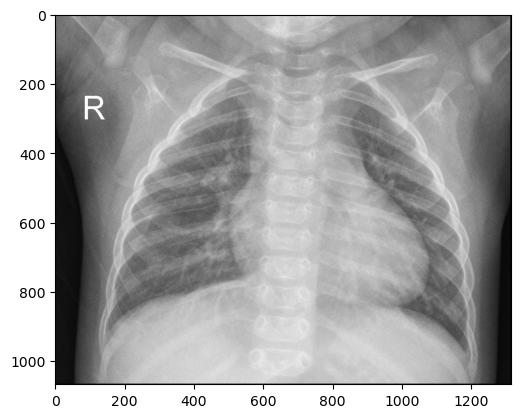

In [9]:
import matplotlib.pyplot as plt
img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1247-0001.jpeg")
plt.imshow(img,cmap='gray')

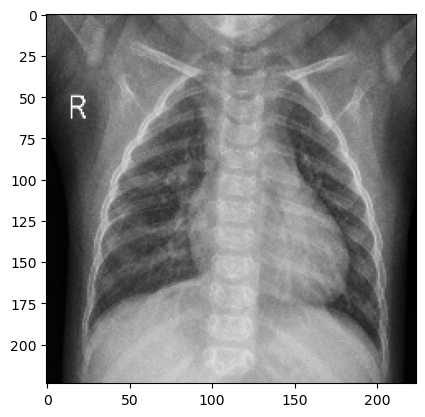

In [10]:
img_resized = cv2.resize(img, (224, 224))
      

            # perform gamma correction on the image
gamma = 1.5
img_gamma = np.power(img_resized / 255.0, gamma)
img_gamma = np.uint8(img_gamma * 255)
plt.imshow(img_gamma,cmap='gray')

#             # perform image normalization on the image
# img_norm = cv2.normalize(img_gamma, None, 0, 255, cv2.NORM_MINMAX)

# #             # normalize the pixel values of the image
# #             img_normalized = StandardScaler().fit_transform(img_resized.reshape(-1, 3)).reshape(img_resized.shape)

#             # perform CLAHE  on the image
#             # perform CLAHE on the image
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# img_clahe = clahe.apply(img_norm[:,:,0])

#             # sharpen the image using unsharp masking
# img_sharpened = cv2.GaussianBlur(img_clahe, (5,5), 0)
# img_sharpened = cv2.addWeighted(img_clahe, 1.5, img_sharpened, -0.5, 0)

#             # apply a median filter to the image
# img_median = filters.median(img_sharpened) 

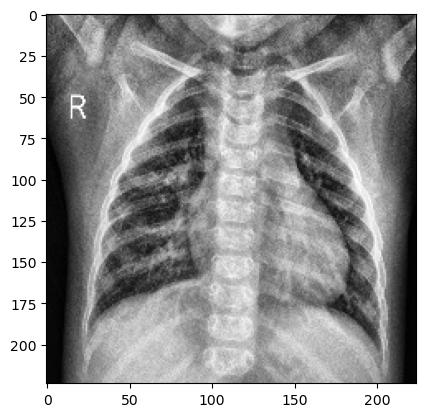

In [11]:
img_norm = cv2.normalize(img_gamma, None, 0, 255, cv2.NORM_MINMAX)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_norm[:,:,0])
plt.imshow(img_clahe,cmap='gray')

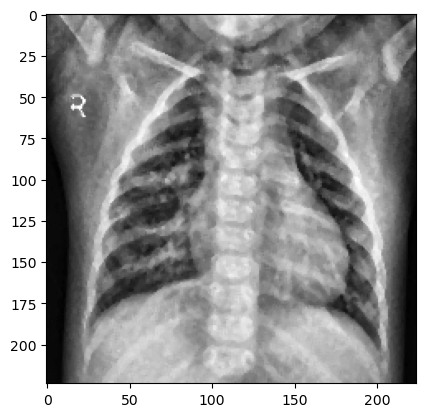

In [12]:
img_sharpened = cv2.GaussianBlur(img_clahe, (5,5), 0)
img_sharpened = cv2.addWeighted(img_clahe, 1.5, img_sharpened, -0.5, 0)

            # apply a median filter to the image
img_median = filters.median(img_sharpened) 
plt.imshow(img_median,cmap='gray')

Text(0.5, 1.0, 'Pre=Processed')

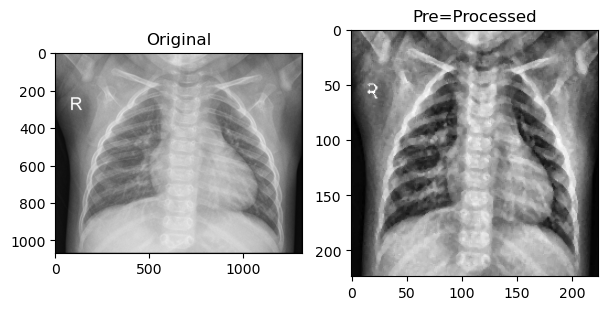

In [13]:
fig = plt.figure(figsize= (7,5))

plot1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
plot1.set_title('Original')

plot2 = fig.add_subplot(1,2,2)
plt.imshow(img_median,cmap='gray')
plot2.set_title('Pre=Processed')

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_path1 = "/kaggle/working/chest-xray-pneumonia/chest_xray/train"
train_generator = train_datagen.flow_from_directory(train_path1,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                        
                                                    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [18]:
val_generator = val_datagen.flow_from_directory(val_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 16 images belonging to 2 classes.


In [19]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 624 images belonging to 2 classes.


In [32]:
base_model = tf.keras.applications.VGG16(input_shape=img_size + (3,),
                                         include_top=False,
                                         weights='imagenet')

In [37]:
base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model - Adam optimizer lr 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)               

In [42]:
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = val_generator.n//val_generator.batch_size

# train the model
hist = model.fit_generator(train_generator,
          steps_per_epoch=steps_per_epoch,
          epochs=20,
          validation_data=val_generator,
          validation_steps=validation_steps)

# evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test accuracy: {accuracy*100:.2f}%')

# compute f1 score on the test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == "__main__":


Epoch 1/20
81/81 [==============================] - 73s 893ms/step - loss: 0.1673 - accuracy: 0.9317
Epoch 2/20
81/81 [==============================] - 71s 878ms/step - loss: 0.1526 - accuracy: 0.9389
Epoch 3/20
81/81 [==============================] - 73s 897ms/step - loss: 0.1478 - accuracy: 0.9418
Epoch 4/20
81/81 [==============================] - 72s 884ms/step - loss: 0.1584 - accuracy: 0.9365
Epoch 5/20
81/81 [==============================] - 71s 870ms/step - loss: 0.1612 - accuracy: 0.9332
Epoch 6/20
81/81 [==============================] - 71s 872ms/step - loss: 0.1541 - accuracy: 0.9414
Epoch 7/20
81/81 [==============================] - 72s 885ms/step - loss: 0.1705 - accuracy: 0.9359
Epoch 8/20
81/81 [==============================] - 71s 873ms/step - loss: 0.1539 - accuracy: 0.9369
Epoch 9/20
81/81 [==============================] - 71s 871ms/step - loss: 0.1500 - accuracy: 0.9400
Epoch 10/20
81/81 [==============================] - 71s 871ms/step - loss: 0.1388 - accura

In [45]:
def preprocess(img):
    
            img_resized = cv2.resize(img, (224, 224))
      

            # perform gamma correction on the image
            gamma = 1.5
            img_gamma = np.power(img_resized / 255.0, gamma)
            img_gamma = np.uint8(img_gamma * 255)

            # perform image normalization on the image
            img_norm = cv2.normalize(img_gamma, None, 0, 255, cv2.NORM_MINMAX)

#             # normalize the pixel values of the image
#             img_normalized = StandardScaler().fit_transform(img_resized.reshape(-1, 3)).reshape(img_resized.shape)

            # perform CLAHE  on the image
            # perform CLAHE on the image
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            img_clahe = clahe.apply(img_norm[:,:,0])

            # sharpen the image using unsharp masking
            img_sharpened = cv2.GaussianBlur(img_clahe, (5,5), 0)
            img_sharpened = cv2.addWeighted(img_clahe, 1.5, img_sharpened, -0.5, 0)

            # apply a median filter to the image
            img_median = filters.median(img_sharpened) 
            return(img_median)

    

In [53]:
for category in os.listdir(test_path):
    os.chdir(os.path.join(test_path,category))
    pathf = os.path.join("/kaggle/working/chest-xray-pneumonia/chest_xray/test",category)
    os.mkdir(pathf)
    print(category)
    
    for ix in os.listdir(): #Images
            img = cv2.imread(ix)
            img_median = preprocess(img)
            filename1 = str(pathf)+"/"+ix
            filename2 = str(pathf)+"/"+"modified_"+ix
#             cv2.imwrite(filename1,img)
            cv2.imwrite(filename2,img_median) # Saving Modified Image
            print(str(ix+"saved"))
    


PNEUMONIA
person1676_virus_2892.jpegsaved
person1650_virus_2852.jpegsaved
person22_virus_55.jpegsaved
person122_bacteria_582.jpegsaved
person85_bacteria_417.jpegsaved
person79_virus_148.jpegsaved
person29_virus_64.jpegsaved
person123_bacteria_587.jpegsaved
person75_virus_136.jpegsaved
person153_bacteria_725.jpegsaved
person173_bacteria_831.jpegsaved
person16_virus_47.jpegsaved
person138_bacteria_659.jpegsaved
person112_bacteria_538.jpegsaved
person83_bacteria_409.jpegsaved
person23_virus_56.jpegsaved
person80_bacteria_392.jpegsaved
person140_bacteria_667.jpegsaved
person3_virus_17.jpegsaved
person97_bacteria_468.jpegsaved
person1_virus_11.jpegsaved
person83_bacteria_410.jpegsaved
person127_bacteria_604.jpegsaved
person121_bacteria_578.jpegsaved
person1650_virus_2854.jpegsaved
person21_virus_52.jpegsaved
person82_bacteria_402.jpegsaved
person1685_virus_2903.jpegsaved
person82_bacteria_403.jpegsaved
person26_virus_60.jpegsaved
person1663_virus_2876.jpegsaved
person77_virus_139.jpegsaved


In [54]:
test_path1 = "/kaggle/working/chest-xray-pneumonia/chest_xray/test"
test_generator1 = test_datagen.flow_from_directory(test_path1,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 624 images belonging to 2 classes.


In [56]:
# evaluate the model on the preprocessed test dataset
loss, accuracy = model.evaluate(test_generator1, steps=len(test_generator1))
print(f'Test accuracy: {accuracy*100:.2f}%')

# compute f1 score on the test dataset
y_true = test_generator1.classes
y_pred = model.predict(test_generator1)
y_pred = np.argmax(y_pred, axis=1)


10/10 [==============================] - 3s 286ms/step - loss: 0.3869 - accuracy: 0.8718
Test accuracy: 87.18%
10/10 [==============================] - 3s 292ms/step


In [57]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print(f'F1 score: {f1:.2f}')

F1 score: 0.00


In [60]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


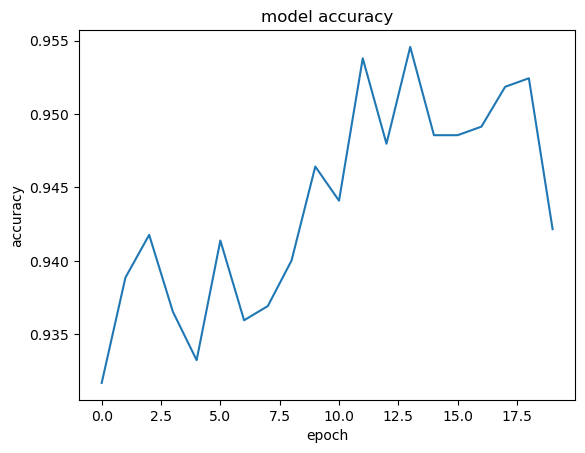

In [63]:

plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Steps to Enhance accuracy further.